In [29]:
import sklearn.datasets as skd
flores = skd.load_iris(as_frame = True)
flores.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


sum alpha*y = 0.0


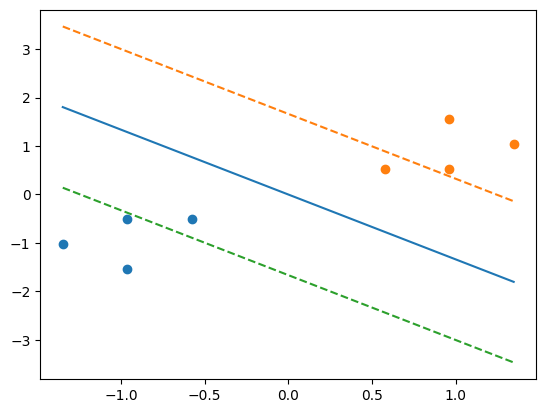

lam 				 d 

0.0  |  1.7041364881061805
0.17275851344402607  |  1.0843123525135052
0.40880146964120195  |  0.7746535412329518
0.0  |  1.7046430011377485
0.40880146964120195  |  0.7746535412329518
0.0  |  1.7046430011377485
0.0  |  1.7041364881061805
0.17275851344402607  |  1.0843123525135052
norm w
1.0039957133852913
[-1.]
[-1.  1. -1.]


In [30]:
import numpy as np
import matplotlib.pyplot as plt 

# el primal min L = |w|^2/2 + C SUMA Ei  - SUMA li [ yi(w.xi + b) -1 + Ei ] - SUMA ui Ei
# el dual es max SUMA li  -SUMA li lj yi yj (xi . xj)/2
# derivando /delta li  
# delta L /delta lk = 1 - SUMA lj yj yk (xj.xk) 
#                   = 1 - yk SUMA_j lj yj Kjk

    
def resolver_dual(X,y,C=1.0,lr=0.0001,N=10000):
    n = len(y)
    lam = np.zeros(n)
    K = X@X.T
    for _ in range(N):
        grad = 1 - y*(K@(lam*y))      # Kij = X @ X.T kernel lineal xi.xj , lam. y  K @ (lam.y) = SUMA liyjKij luego por yi
        lam = lam + lr * grad         # maxL(l)
        lam = np.clip(lam,0,C)        #lam = np.maximum(lam, 0) #hard:li >=0   soft-margin:0<=li<=C  
        lam = lam - y*(lam@y)/(y@y)   # SUMA liyi =0, proyeccion ortogonal quitando la componente en la direccion y
        lam = np.clip(lam,0,C)
    return lam
    
# de derivar el primal se tenia w = SUMA li yi xi
# yi(w.xi + b) = 1 depejando b = yi  - w.xi

def entrenar_svm(X,y,C=1.0):
    lam = resolver_dual(X,y,C)
    w = np.sum(lam[:,None]*y[:,None]*X,axis=0)
    sv = (lam>1e-5) & (lam<C-1e-5)       #sv = lam >1e-5  #  alpha[0,0,1.23,0,0.44,0,...] hard:alphai>0 , sv =[false,false,True,False,True,..indices]  soft-margin: 0<alphai<C
    b = np.mean(y[sv] - X[sv]@w )        # y[sv] = y[solo con indices True]
    return w,b,lam

# f= w.x + b   w= SUMA liyixi

def predecir(X,w,b):
    return np.sign(X@w + b)
    
def exactitud(y,y_p):
    return np.mean(y == y_p)
 
     
if __name__=='__main__':
    X = np.array([
        [1,2],
    [2,3],
    [3,3],
    [2,1],
    [6,5],
    [7,7],
    [8,6],
    [7,5]])
    y = np.array([-1,-1,-1,-1,1,1,1,1])
    u = X.mean(axis = 0)
    sigma = X.std(axis = 0)
    X = (X - u )/sigma
    plt.scatter(X[y==-1][:,0], X[y==-1][:,1])
    plt.scatter(X[y==1][:,0], X[y==1][:,1])
    w,b,lam = entrenar_svm(X,y) 
    print("sum alpha*y =", lam@y)               # SUMA alphai yi =0
    x_vals = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    y_vals = -(w[0]*x_vals + b)/w[1]            # w.x + b =0 w1.x1 + w2.x2 + b=0 → x2 = -(b+w1.x1)/w2
    plt.plot(x_vals, y_vals)
    margin1 = -(w[0]*x_vals + b - 1)/w[1]       # w.x + b =1 → x2 = -(w1*x1 + b - 1)/w2
    margin2 = -(w[0]*x_vals + b + 1)/w[1]       # w.x + b =-1 → x2 = -(w1*x1 + b + 1)/w2
    plt.plot(x_vals, margin1, '--')
    plt.plot(x_vals, margin2, '--')
    plt.show()
    d = y*(X@w + b)                             # que tan lejos esta el punto del hiperplano en la direccion correcta  si di>1 alphai =0  , di=1 alphai>0  si di<1 alphai=C
    print("lam \t\t\t\t d \n")
    for i in range(len(y)):
        print(lam[i], " | ", d[i])
    print(f"norm w\n{np.linalg.norm(w)}")
    x_test = np.array([[4,4]])
    x_test = (x_test  - u )/sigma
    print(predecir(x_test,w,b))
    X_test = np.array([
    [4,4],
    [6,7],
    [1,2]
    ])
    X_test = (X_test - u)/sigma
    print(predecir(X_test, w, b))
    # con la data del profe
    

sum alpha*y = -0.012997430315057068
lam 				 d 

0.0001533111464965379  |  1.0986927335359602
0.0001533111464965379  |  1.0986927335359602
0.0001533111464965379  |  1.2015223284881946
0.0001533111464965379  |  0.9958631385837249
0.0001533111464965379  |  1.0986927335359602
0.08187110847521771  |  0.6864456442431761
0.0001533111464965379  |  1.0468135813179202
0.0001533111464965379  |  0.9958631385837249
0.0001533111464965379  |  1.0986927335359602
0.0001533111464965379  |  1.0477422908017644
0.0001533111464965379  |  0.9958631385837249
0.0001533111464965379  |  0.89303354363149
0.0001533111464965379  |  1.1505718857539997
0.0001533111464965379  |  1.4590606706107039
0.0001533111464965379  |  1.30435192344043
0.0001533111464965379  |  0.8921048341476454
0.0001533111464965379  |  1.0977640240521152
0.0001533111464965379  |  1.0468135813179202
0.03946435702383214  |  0.7383247964612156
0.0001533111464965379  |  0.9439839863656849
0.0001533111464965379  |  0.7902039486792556
0.000153311146

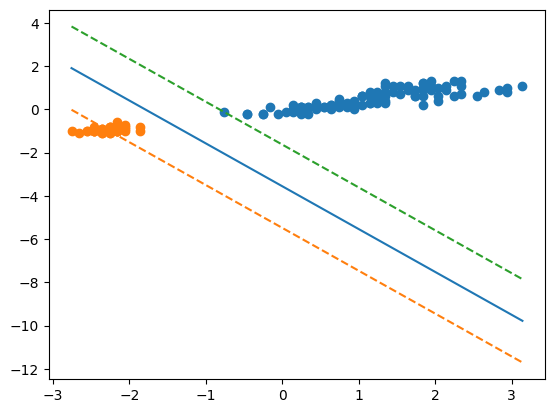

In [67]:
def testeo_flores():
    flores = skd.load_iris(as_frame = True)
    flores.frame
    X_1 = flores.data[['petal length (cm)','petal width (cm)']].values
    y = np.where(flores.target == 0,1,-1)
    u = X_1.mean(axis = 0)
    sigma = X.std(axis = 0)
    X_1 = (X_1 - u)/sigma
    w,b,lam = entrenar_svm(X_1,y)
    print("sum alpha*y =", lam@y) 
    plt.scatter(X_1[y==-1][:,0],X_1[y==-1][:,1])
    plt.scatter(X_1[y==1][:,0],X_1[y==1][:,1])
    x_s = np.linspace(X_1[:,0].min(),X_1[:,0].max(),100)
    y_s = -(w[0]*x_s + b)/w[1]
    plt.plot(x_s,y_s)
    margen1 = -(w[0]*x_s + b - 1)/w[1]
    margen2 = -(w[0]*x_s + b + 1)/w[1]
    plt.plot(x_s,margen1,'--')
    plt.plot(x_s,margen2,'--')
    plt.plot()
    d = y*(X_1@w + b)                             # que tan lejos esta el punto del hiperplano en la direccion correcta  si di>1 alphai =0  , di=1 alphai>0  si di<1 alphai=C
    print("lam \t\t\t\t d \n")
    for i in range(len(y)):
        print(lam[i], " | ", d[i])
    print(f"norm w\n{np.linalg.norm(w)}")
    print(d.min())
    np.sum(lam > 1-1e-5)
testeo_flores()

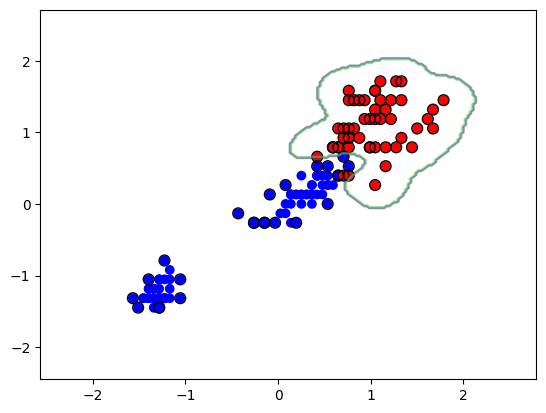

support vectors: 75
max lambda: 1.0000131216485157
min lambda>0: 1.3121648515713365e-05


In [65]:
    
#-----------------CON KERNEL----------------------------

def K_rbf(X,gamma):
    # |xi - xj|^2 = |xi|^2 + |xj|^2 - 2 xi . xj 
    x2 = np.sum(X**2,axis=1)
    m = x2.shape[0]
    col = x2.reshape(m,1)
    fil = x2.reshape(1,m)           # |x1|**2 + |x1|**2   |x1|**2 + |x2|**2   A + |x3|**2 , B+ A  B +B  B +C , C +A C +B C+C ,filas
    dist = col + fil - 2*(X@X.T)
    return np.exp(-gamma*dist)

def resolver_dual_kernel(X,y,C,gamma,lr=0.01,N=5000):
    n = len(y)
    lam = np.zeros(n)
    K = K_rbf(X,gamma)
    for _ in range(N):
        grad = 1 - y*(K@(lam*y))
        lam = lam + lr*grad
        lam = np.clip(lam,0,C)
        lam = lam - y*(lam@y)/(y@y)
    return lam

# b = yi - SUMA lj yj K(xj,xi) 

def entrenar_svm_kernel(X,y,C=1.0,gamma=1.0):
    lam = resolver_dual_kernel(X,y,C,gamma)
    sv = (lam>1e-5) & (lam<C-1e-5)
    if np.sum(sv) == 0 :
        sv = lam >1e-5            # si  alphai=0 lejos del margen , 0<alphai<C en el margen , alpha=C ruido
    K = K_rbf(X,gamma)
    k = K[:,sv]
    b = np.mean(y[sv] - (lam*y)@k)
    return lam,b

def K_rbf_(X,x,gamma):
    x1_2 = np.sum(X**2,axis=1)
    x2_2 = np.sum(x**2,axis=1)
    m = x1_2.shape[0]
    n = x2_2.shape[0]
    col = x1_2.reshape(m,1)
    fil = x2_2.reshape(1,n)
    dist = col + fil - 2*(X@x.T)
    return np.exp(-gamma*dist)

#w = SUMA li yi phi(xi)
#f = w.phi(x) + b
#f =  SUMA li yi phi(xi) . phi(x) + b
#f =  SUMA li yi (phi(xi).phi(x))+ b
#f =  SUMA li yi K(xi,x) + b

def predecir_k(X_,y,lam,b,x,gamma=1.0):
    K = K_rbf_(X_,x,gamma)
    return np.sign((lam*y)@K + b)

def grid_(X):
    xx,yy = np.meshgrid(
        np.linspace(X[:,0].min()-1,X[:,0].max()+1,200),
        np.linspace(X[:,1].min()-1,X[:,1].max()+1,200)
    )
    grid = np.c_[xx.ravel(),yy.ravel()]
    return grid,xx,yy
    
def testeo_flores_kernel():
    flores = skd.load_iris(as_frame = True)
    flores.frame
    X = flores.data[['petal length (cm)','petal width (cm)']].values
    y = np.where(flores.target==2,1,-1)
    u = X.mean(axis=0)
    sigma = X.std(axis=0)
    X = (X - u)/sigma
    lam, b = entrenar_svm_kernel(X,y,gamma=10)
    grid,xx,yy = grid_(X)
    z = predecir_k(X,y,lam,b,grid,gamma=20)
    z = z.reshape(xx.shape)
    plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
    plt.contour(xx,yy,z,alpha=0.2)
    sv = lam > 1e-5
    plt.scatter(X[sv,0], X[sv,1], 
            s=60, 
            facecolors='none', 
            edgecolors='k')
    plt.show()
    print("support vectors:", np.sum(lam > 1e-5))   # li = 0 lejos del margen , 0<li<C sv en el margen  , li=C dentro del margen o mal clasificados
    print("max lambda:", lam.max())
    print("min lambda>0:", lam[lam>1e-5].min())
    
testeo_flores_kernel()